In [1]:
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


In [49]:
# Import librarys
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

In [3]:
# Load the dataset
df = pd.read_csv('/content/data/MyDrive/creditcard_dataset/creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Data preprocessing
# Split the dataset into features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Handle missing values
X = X.dropna()

# Perform feature scaling using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
# Split the dataset into training and validation sets
# The stratify=y parameter ensures that the class distribution is maintained in the sample.
train_s=0.1
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=(0.2*train_s),train_size=train_s, stratify=y, random_state=42)

# Printing the shape ofthe sets
print(f'shape of the Dataset: {df.shape}')
print('--------------------------')
print(f'shape of the x-train: {X_train.shape}')
print(f'shape of the y-train: {y_train.shape}')
print(f'shape of the x-val: {X_val.shape}')
print(f'shape of the y-val: {y_val.shape}')

shape of the Dataset: (284807, 31)
--------------------------
shape of the x-train: (28480, 30)
shape of the y-train: (28480,)
shape of the x-val: (5697, 30)
shape of the y-val: (5697,)


In [6]:
# Define the parameter grid to search over
param_grid = {
    'C': [0.1,0.5,5,10,30],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.01, 0.001]
}

# Create an SVM object
svm = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the data to the GridSearchCV object
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters found by GridSearchCV and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'C': 5, 'gamma': 0.001, 'kernel': 'rbf'}
Best score: 0.9993679775280899


In [7]:
# Make predictions on the validation set
y_pred = best_model.predict(X_val)

# Evaluate the model's performance
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5687
           1       1.00      0.80      0.89        10

    accuracy                           1.00      5697
   macro avg       1.00      0.90      0.94      5697
weighted avg       1.00      1.00      1.00      5697



In [41]:
# Set the hyperparameters for the one-class SVM
# nu is Controlling the proportion of outliers (0.1 means 10% of the training data is considered outliers)
# gamma is Kernel coefficient for 'rbf' (controls the smoothness of the decision boundary)
# Create and train the one-class SVM model
svm_model = OneClassSVM(nu=0.05, kernel='rbf', gamma= 0.1)
svm_model.fit(X_train)

OneClassSVM(gamma=0.1, nu=0.05)

In [54]:
# Predict outliers on the validation data and changing the lables
y_pred = svm_model.predict(X_val)
y_pred = [1 if i==-1 else 0 for i in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)

# Calculate precision
precision = precision_score(y_val, y_pred,average='macro')

# Calculate recall
recall = recall_score(y_val, y_pred,average='macro')

# Calculate F1 score
f1 = f1_score(y_val, y_pred,average='macro')

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_val, y_pred)

# Calculate average precision score
avg_precision = average_precision_score(y_val, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Average Precision Score: {avg_precision}")

Accuracy: 0.8920484465508162
Precision: 0.5071245723801383
Recall: 0.8960172322841569
F1 Score: 0.48564259827153605
ROC AUC Score: 0.8960172322841569
Average Precision Score: 0.013177136117654783


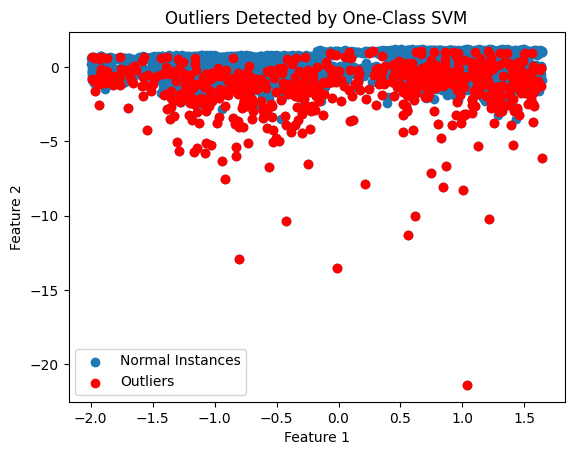

In [55]:
# Create the 2D plot
# Find the indices of the outliers (instances labeled as -1)
outlier_indices = [i for i, label in enumerate(y_pred) if label == 1]

# Plotting the outliers
plt.scatter(X_val[:, 0], X_val[:, 1], label='Normal Instances')
plt.scatter(X_val[outlier_indices, 0], X_val[outlier_indices, 1], c='red', label='Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Outliers Detected by One-Class SVM')
plt.legend()
plt.show()

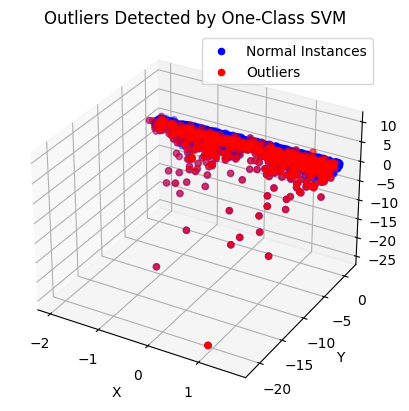

In [56]:
# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the normal instances
ax.scatter(X_val[y_val == 0, 0], X_val[y_val == 0, 1], X_val[y_val == 0, 2], c='b', label='Normal Instances')

# Plot the outliers
ax.scatter(X_val[outlier_indices, 0], X_val[outlier_indices, 1], X_val[outlier_indices, 2], c='r', label='Outliers')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Outliers Detected by One-Class SVM')
ax.legend()

plt.show()